#  Team: Still Lost in ML

In [3]:
''' 
Notebook

* Usar Pipelines  

* Usar Estimadores Supervisados y No Supervisados  

* Usar OneHotEncoder de forma que no haya errores si una variable categórica tiene valores que aparecen o no aparecen en train y test

* Usar validación cruzada y explicar la gran ventaja de los Pipelines en validación cruzada (pensad en qué puede ser ;) )  

* Usar GridsearchCV  

* Opcional: Usar Entornos Virtuales para el desarrollo y ejecución del código (incluyendo sus respectivos archivos `requirements.txt` y `.gitignore`)

* Opcional: Calcular alguna regresión donde el target no esté distribuido de forma gaussiana  

* Opcional: Calcular alguna clasificación donde el target esté desbalanceado (¡ojo!)  '

'''

" \nNotebook\n\n* Usar Pipelines  \n\n* Usar Estimadores Supervisados y No Supervisados  \n\n* Usar OneHotEncoder de forma que no haya errores si una variable categórica tiene valores que aparecen o no aparecen en train y test\n\n* Usar validación cruzada y explicar la gran ventaja de los Pipelines en validación cruzada (pensad en qué puede ser ;) )  \n\n* Usar GridsearchCV  \n\n* Opcional: Usar Entornos Virtuales para el desarrollo y ejecución del código (incluyendo sus respectivos archivos `requirements.txt` y `.gitignore`)\n\n* Opcional: Calcular alguna regresión donde el target no esté distribuido de forma gaussiana  \n\n* Opcional: Calcular alguna clasificación donde el target esté desbalanceado (¡ojo!)  '\n\n"

In [4]:
""" 
'-': FALTA              <----- ACTUALIZAR
'+': COMPLETADO

ENTREGABLES

1.  + Crear Repositorio de GitHub

2. Carpetas y documentos del repositorio
    
    + `README.md`
    
    + `/src`
        + `/src/data`
            + car_price_train.csv
            + car_price_test.csv
            + car_price_dataset.csv
            + car_price_train_target.csv
            + car_price_test_target.csv
        
        + `/src/result_notebooks`
                ├─ src
                    ├─ data
                    └─ models
                        └─ best_model.pkl

            - Still_Lost_in_ML_Pipelines_I.ipynb            <----- ACTUALIZAR
            - Still_Lost_in_ML_Pipelines_II.ipynb           <----- ACTUALIZAR
        
        +`/src/notebooks
              └─ Still_Lost_in_ML - Notebook.ipynb          <----- ACTUALIZAR
    
        + `/src/utils`
            + bootcampviztools.py
            + toolbox_ML.py
    
    + `requirements.txt`

3. Hacer una descripción del código creado en una breve presentación de 10-15 minutos 
    - donde además expliquéis vuestros casos de uso de ML con pipelines
    - las ventajas que os aportan
    - Incluir también esta presentación en el repositorio

"""

" \n'-': FALTA              <----- ACTUALIZAR\n'+': COMPLETADO\n\nENTREGABLES\n\n1.  + Crear Repositorio de GitHub\n\n2. Carpetas y documentos del repositorio\n    \n    + `README.md`\n    \n    + `/src`\n        + `/src/data`\n            + car_price_train.csv\n            + car_price_test.csv\n            + car_price_dataset.csv\n            + car_price_train_target.csv\n            + car_price_test_target.csv\n        \n        + `/src/result_notebooks`\n                ├─ src\n                    ├─ data\n                    └─ models\n                        └─ best_model.pkl\n\n            - Still_Lost_in_ML_Pipelines_I.ipynb            <----- ACTUALIZAR\n            - Still_Lost_in_ML_Pipelines_II.ipynb           <----- ACTUALIZAR\n        \n        +`/src/notebooks\n              └─ Still_Lost_in_ML - Notebook.ipynb          <----- ACTUALIZAR\n    \n        + `/src/utils`\n            + bootcampviztools.py\n            + toolbox_ML.py\n    \n    + `requirements.txt`\n\n3. Hacer

Dataset: https://www.kaggle.com/datasets/asinow/car-price-dataset

## importando Librerías

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [6]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), '../utils'))

from bootcampviztools import *
from toolbox_ML import *


## 0. Carga de datos y primera visualización

Importando Conjunto de Datos

In [7]:
df_car = pd.read_csv("../data/car_price_dataset.csv")
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [8]:
print ("Hay", df_car.duplicated().sum(), "duplicado(s) en el conjunto de datos")

Hay 0 duplicado(s) en el conjunto de datos


In [9]:
describe_df(df_car)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
DATA_TYPE,object,object,int64,float64,object,object,int64,int64,int64,int64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,10,30,24,41,4,3,9854,4,5,6661
CARDIN(%),0.1,0.3,0.24,0.41,0.04,0.03,98.54,0.04,0.05,66.61


In [10]:
tipifica_variable(df_car, umbral_categoria=15, motrar_card=True)

,nombre_variable,CARD,%_CARD,tipo_sugerido,tipo_real
0,Brand,10,0.10,Categórica,object
1,Model,30,0.30,Numerica Discreta,object
2,Year,24,0.24,Numerica Discreta,int64
3,Engine_Size,41,0.41,Numerica Discreta,float64
4,Fuel_Type,4,0.04,Categórica,object
5,Transmission,3,0.03,Categórica,object
6,Mileage,9854,98.54,Numerica Continua,int64
7,Doors,4,0.04,Categórica,int64
8,Owner_Count,5,0.05,Categórica,int64
9,Price,6661,66.61,Numerica Continua,int64


In [11]:
df_car.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Definiendo target y features

In [12]:
target = "Price"
features = [col for col in df_car if col != target]

# División de features numéricas y categóricas
features_num = [col for col in features if df_car[col].dtype != object]
features_cat = [col for col in features if df_car[col].dtype == object]


X = df_car[features]
y = df_car[target]

## 0. LIMPIEZA DE DATOS  <--- PIPE 0

In [ ]:
'''
OPCIONAL -> Lo podemos hacer mas adelante una vez tengamos el resto de los pasos

SE PODRÍA METER RUIDO PREVIAMENTE con el fin de realizar limpieza que pudieran usarse como tuberias

- Tipo una columna tipo indice (cardinald 100) para borrar
- Cualquiera otra cosa


'''

## 1. SPLIT TRAIN/TEST

In [13]:
'''
TENGO UNA DUDA.

HABRIA QUE HACER 2 SPLIT NO??
 - 1º) Split para TRAIN y TEST (80/20) POR EJEMPLO
 - 1º) y el del TEST DIVIDIRLO EN 2 (50/50) PARA VALIDACIÓN CRUZADA

DE FORMA QUE NOS QUEDE
    - TRAIN_SET (para crear el modelo)
    - VALIDATION_SET (para cross validation)
    - TEST_SET (para la evaluación el Pipeline II) 

'''

'\nTENGO UNA DUDA.\n\nHABRIA QUE HACER 2 SPLIT NO??\n - 1º) Split para TRAIN y TEST (80/20) POR EJEMPLO\n - 1º) y el del TEST DIVIDIRLO EN 2 (50/50) PARA VALIDACIÓN CRUZADA\n\nDE FORMA QUE NOS QUEDE\n    - TRAIN_SET (para crear el modelo)\n    - VALIDATION_SET (para cross validation)\n    - TEST_SET (para la evaluación el Pipeline II) \n\n'

Dividiendo conjuntos de entrenamiento y prueba (80-20%)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


In [15]:
# Guardar X_train y y_train en un archivo CSV
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('../data/car_price_dataset_train.csv', index=False)

# Guardar X_test y y_test en un archivo CSV
test_df = pd.concat([X_test, y_test], axis=1)
test_df.to_csv('../data/car_price_dataset_test.csv', index=False)

## 2. miniEDA

#### 2.1. NUMÉRICAS

Analisis de variables numéricas y tratamiento

In [16]:
X_train[features_num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         8000 non-null   int64  
 1   Engine_Size  8000 non-null   float64
 2   Mileage      8000 non-null   int64  
 3   Doors        8000 non-null   int64  
 4   Owner_Count  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 375.0 KB


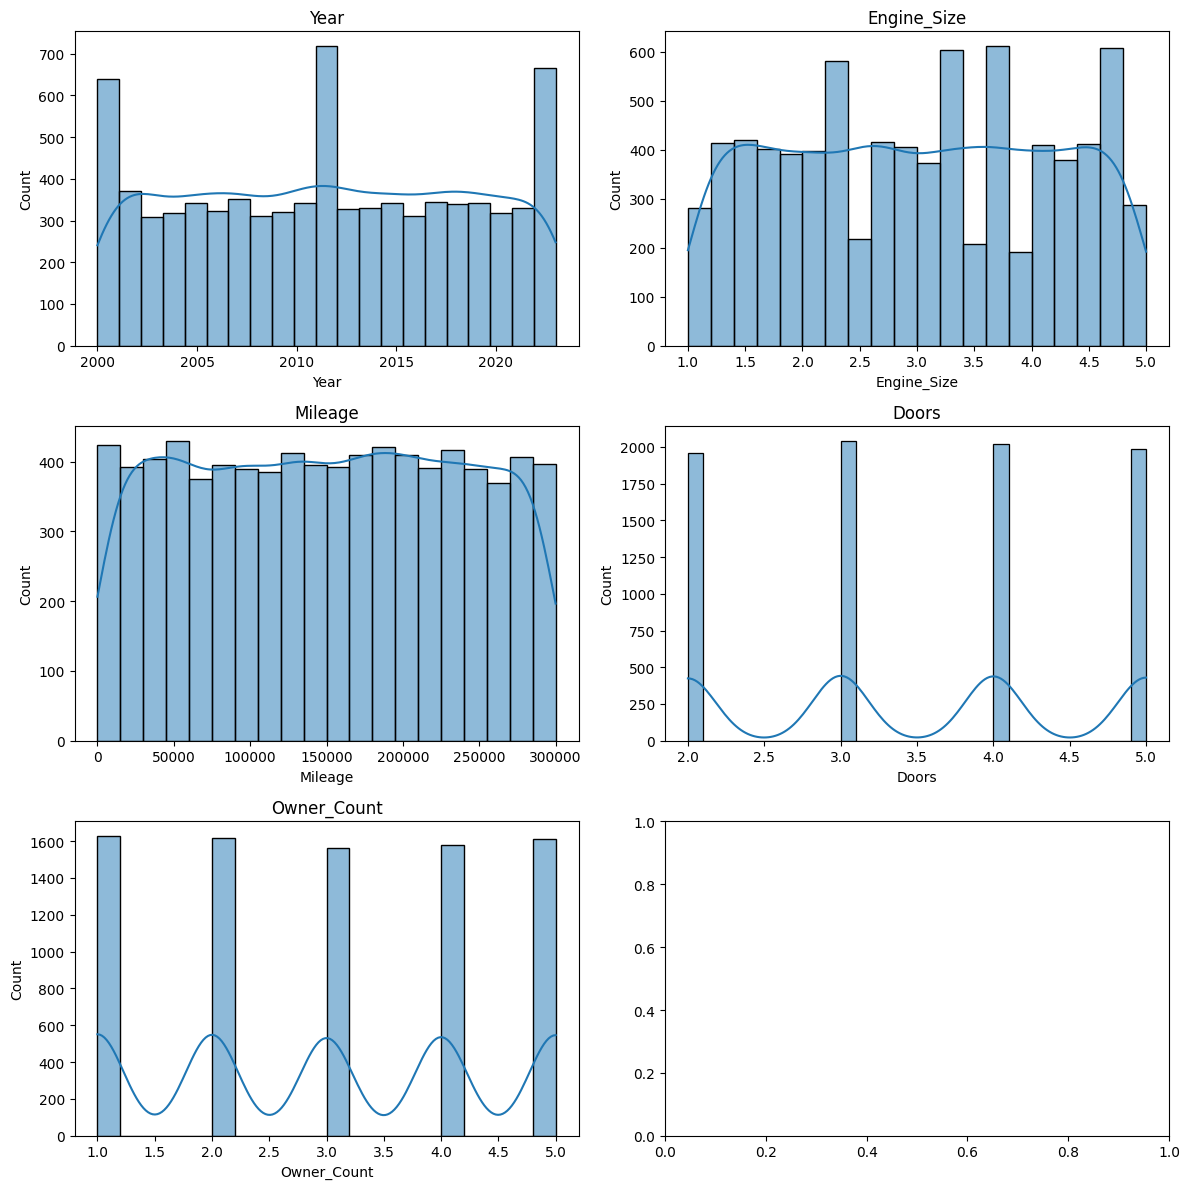

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 

for ax, col in zip(axes.flat, features_num):
    sns.histplot(X_train[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()
plt.show()

Las columnas "Year", "Engine_Size" y "Mileage" no tienen una distribución que pueda aproximarse a una gaussiana, pareciendo casi lineales y constantes. Se crearán representaciones categóricas de estas variables utilizando rangos para ver si el modelo las maneja mejor.

#### 2.2. CATEGÓRICAS

Analisis de variables categóricas y tratamiento

In [18]:
X_train[features_cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         8000 non-null   object
 1   Model         8000 non-null   object
 2   Fuel_Type     8000 non-null   object
 3   Transmission  8000 non-null   object
dtypes: object(4)
memory usage: 312.5+ KB


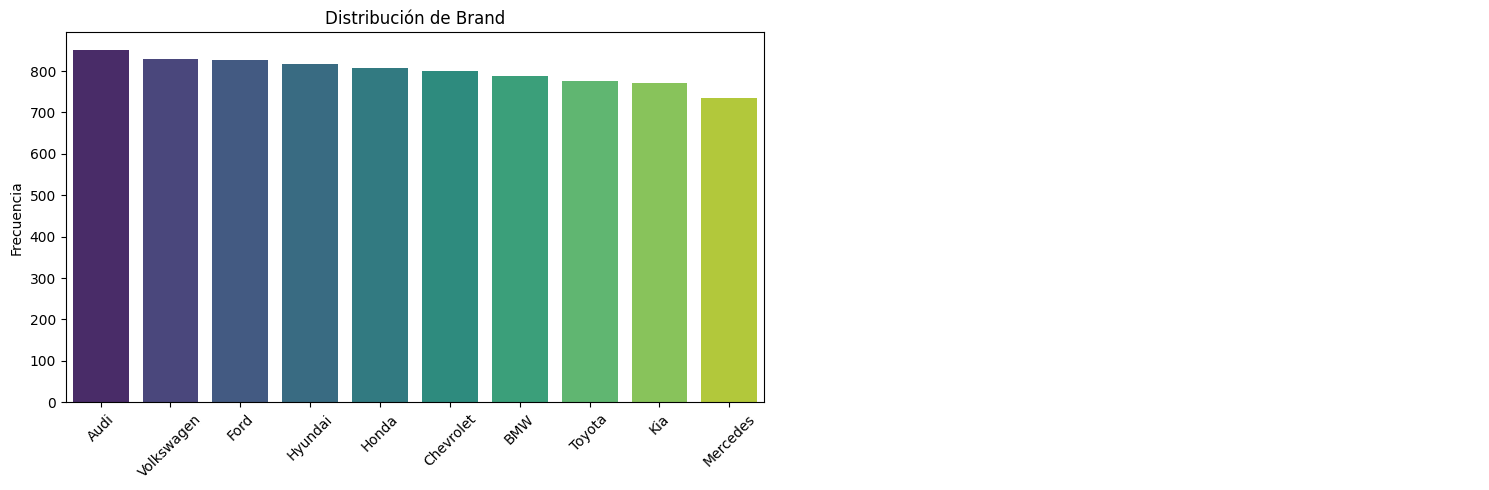

In [19]:
pinta_distribucion_categoricas(X_train, columnas_categoricas=["Brand"])

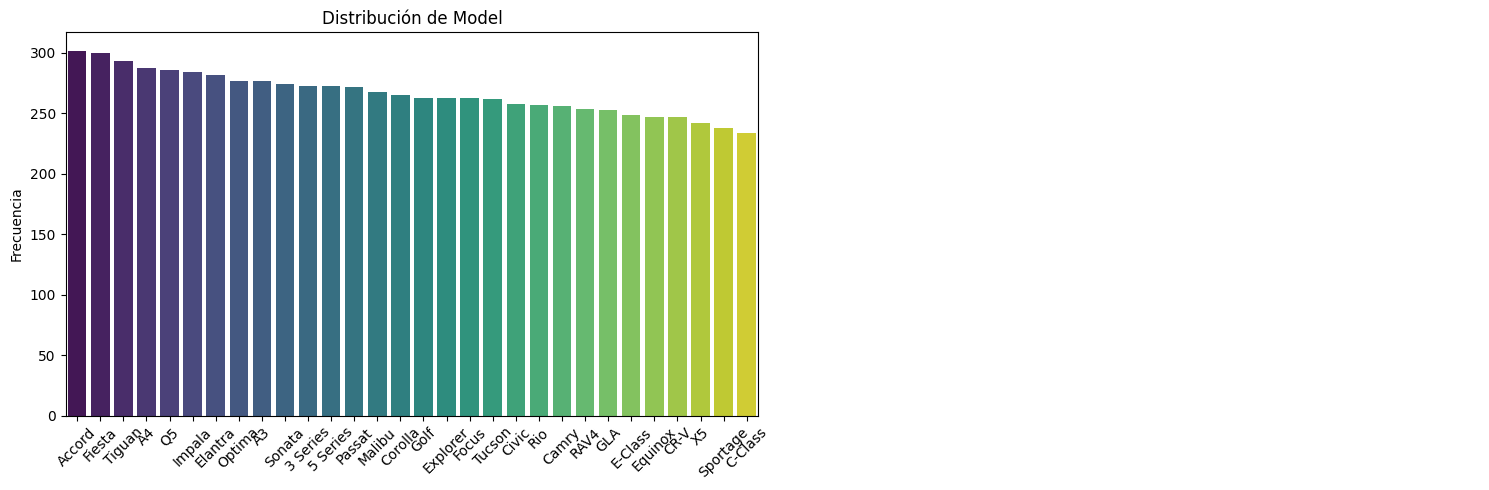

In [20]:
pinta_distribucion_categoricas(X_train, columnas_categoricas=["Model"])

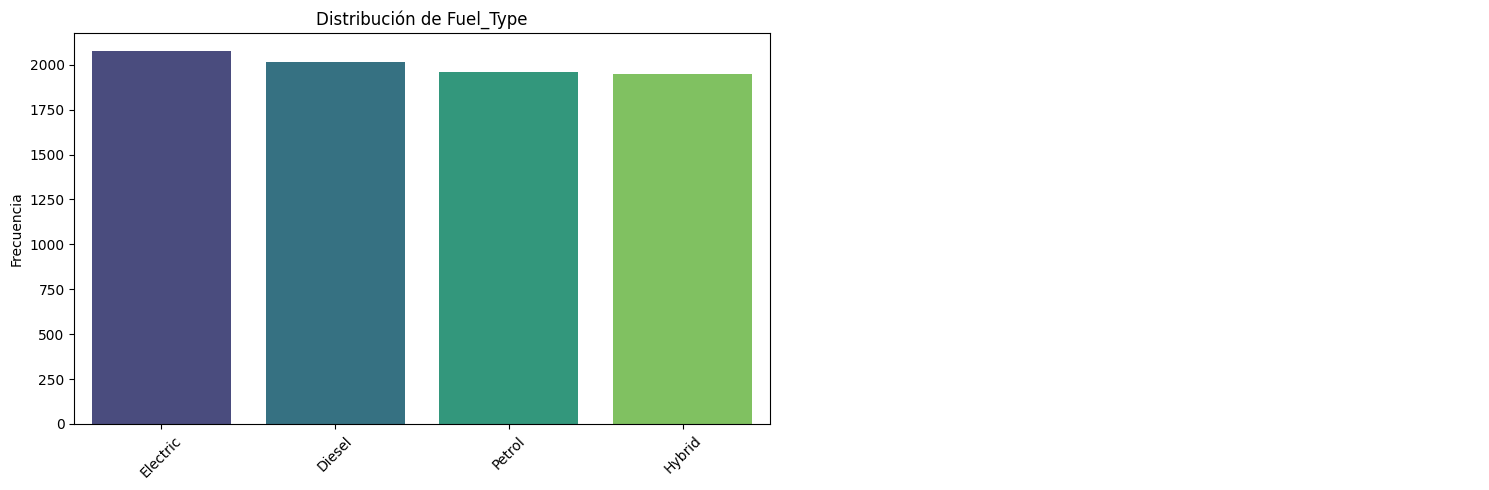

In [21]:
pinta_distribucion_categoricas(X_train, columnas_categoricas=["Fuel_Type"])

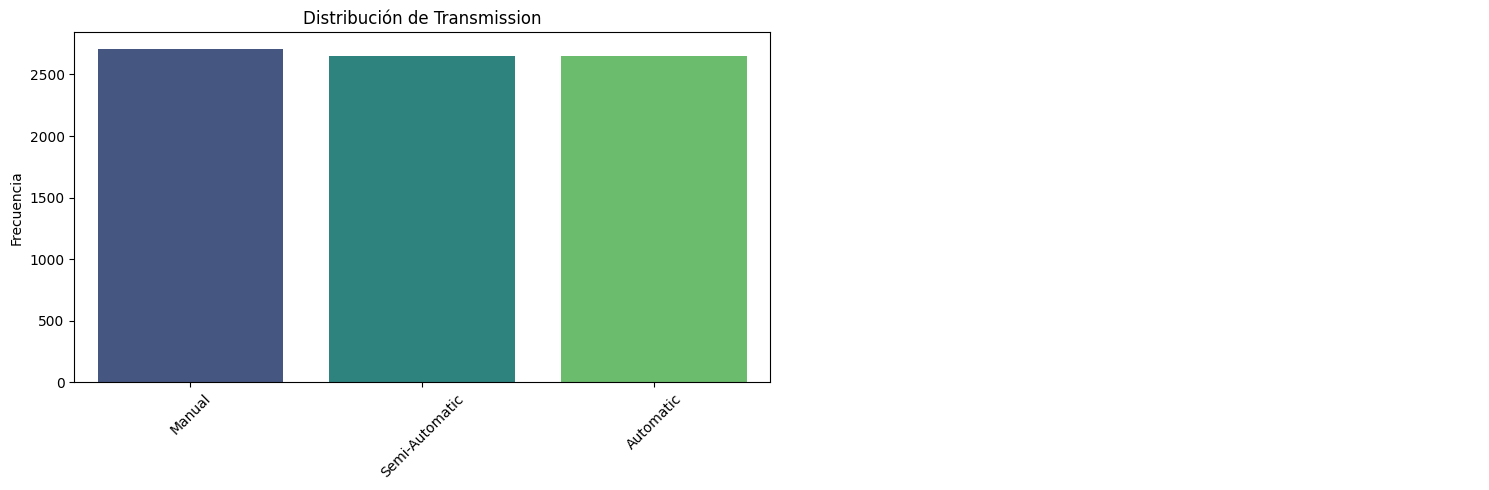

In [22]:
pinta_distribucion_categoricas(X_train, columnas_categoricas=["Transmission"])

## 3. Feature Engineering   <--- PIPE 1

In [23]:
'''
HAY QUE IMPUTAR VALORES FALTANTES (aunque dataset no tenga, lo pone en el enunciado) a la hora de hacer los pipes

'''

'\nHAY QUE IMPUTAR VALORES FALTANTES (aunque dataset no tenga, lo pone en el enunciado) a la hora de hacer los pipes\n\n'

### 3.1. Analizando el TARGET

In [32]:
'''
OPCIONAL

- Hacer un modelo regresion con target no gaussiano

'''

'\nOPCIONAL\n\n- Hacer un modelo regresion con target no gaussiano\n\n'

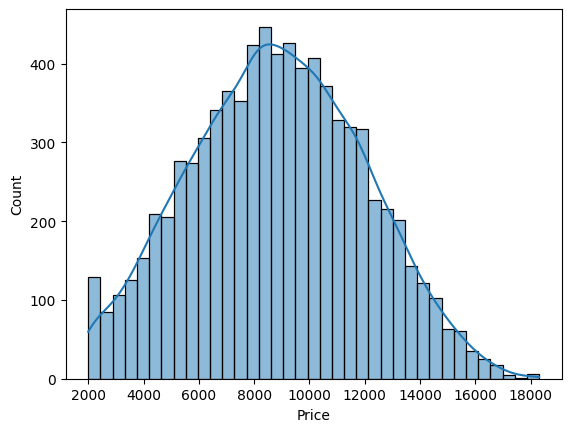

In [33]:
# Distribución parecida con normal/gaussiana
sns.histplot(data=y_train, kde=True)
plt.show()

### 3.2. Transformación CATEGORICAS

##### 'Fuel_Type' y 'Transmission'

In [34]:
# One-Hot-Encoding
from sklearn.preprocessing import OneHotEncoder

X_train_encoded = X_train.copy()

# Encoder para Fuel_Type
encoder_fuel = OneHotEncoder(sparse_output=False)
fuel_encoded = encoder_fuel.fit_transform(X_train[["Fuel_Type"]])  # Fit + transform
fuel_encoded_df = pd.DataFrame(fuel_encoded, 
                               columns=encoder_fuel.get_feature_names_out(["Fuel_Type"]), 
                               index=X_train.index)

# Encoder para Transmission
encoder_transmission = OneHotEncoder(sparse_output=False)
transmission_encoded = encoder_transmission.fit_transform(X_train[["Transmission"]])
transmission_encoded_df = pd.DataFrame(transmission_encoded, 
                                       columns=encoder_transmission.get_feature_names_out(["Transmission"]), 
                                       index=X_train.index)



X_train_encoded = pd.concat([X_train_encoded, fuel_encoded_df, transmission_encoded_df], axis=1)

X_train_encoded.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
9254,Volkswagen,Golf,2007,3.2,Hybrid,Semi-Automatic,33948,5,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1561,BMW,5 Series,2010,4.8,Electric,Semi-Automatic,224853,2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1670,Hyundai,Sonata,2006,1.9,Hybrid,Semi-Automatic,13435,3,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6087,Honda,CR-V,2019,1.7,Diesel,Semi-Automatic,199846,2,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6669,Mercedes,E-Class,2005,3.6,Petrol,Automatic,261,3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0


##### 'Brand' y 'Model'

In [35]:
# Label Encoder

# Encoder para Brand
encoder_brand = LabelEncoder()
brand_encoded = encoder_brand.fit_transform(X_train["Brand"])
X_train_encoded["Brand_Label"] = brand_encoded

# Encoder para Model
encoder_model = LabelEncoder()
model_encoded = encoder_model.fit_transform(X_train["Model"])
X_train_encoded["Model_Label"] = model_encoded 

X_train_encoded.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Brand_Label,Model_Label
9254,Volkswagen,Golf,2007,3.2,Hybrid,Semi-Automatic,33948,5,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9,17
1561,BMW,5 Series,2010,4.8,Electric,Semi-Automatic,224853,2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
1670,Hyundai,Sonata,2006,1.9,Hybrid,Semi-Automatic,13435,3,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,25
6087,Honda,CR-V,2019,1.7,Diesel,Semi-Automatic,199846,2,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
6669,Mercedes,E-Class,2005,3.6,Petrol,Automatic,261,3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7,10


#### Aplicando transformaciones a conjunto prueba

In [36]:
'''
TRANSFORMACIÓN para cross validation
'''

'\nTRANSFORMACIÓN para cross validation\n'

In [37]:
X_test_encoded = X_test.copy()

# One-hot Encoding
encoded_fuel_test = encoder_fuel.transform(X_test[["Fuel_Type"]])
encoded_transmission_test = encoder_transmission.transform(X_test[["Transmission"]])

fuel_columns = encoder_fuel.get_feature_names_out(["Fuel_Type"])
transmission_columns = encoder_transmission.get_feature_names_out(["Transmission"])

encoded_fuel_test = pd.DataFrame(encoded_fuel_test, columns=fuel_columns, index=X_test.index)
encoded_transmission_test = pd.DataFrame(encoded_transmission_test, columns=transmission_columns, index=X_test.index)

X_test_encoded = X_test_encoded.join([encoded_fuel_test, encoded_transmission_test])

# Label Encoding
X_test_encoded["Brand_Label"] = encoder_brand.transform(X_test["Brand"])
X_test_encoded["Model_Label"] = encoder_model.transform(X_test["Model"])

X_test_encoded.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Brand_Label,Model_Label
6252,BMW,3 Series,2005,1.2,Diesel,Manual,257760,5,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4684,Volkswagen,Golf,2013,2.9,Hybrid,Automatic,111790,5,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9,17
1731,Toyota,RAV4,2011,5.0,Hybrid,Automatic,13473,5,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8,23
4742,Mercedes,E-Class,2007,3.8,Diesel,Manual,133298,4,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,10
4521,Honda,Civic,2012,1.3,Petrol,Automatic,18611,3,5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,8


### 3.3. Transformación NUMERICAS

3.3.1. TRANSFORMACIONES

In [38]:
# # Por simplicidad no vamos a aplicar el logaritmo en esta sesión, pero si quieres investigar:
# from sklearn.preprocessing import FunctionTransformer

# log_function = FunctionTransformer(np.log1p)

3.3.2. ESCALADO

In [ ]:
'''
FALTARIA standarscaler

Las columnas Brand_Label y Model_Label no necesitan ser escaladas.

'''

# # Seleccionar las columnas numéricas
# numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']

# # Crear una copia del DataFrame para no modificar el original
# X_train_scaled = X_train_encoded.copy()
# X_test_scaled = X_test_encoded.copy()

# # Inicializar el escalador
# scaler = StandardScaler()

# # Ajustar el escalador en los datos de entrenamiento y transformar los datos de entrenamiento
# X_train_scaled[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])

# # Transformar los datos de prueba
# X_test_scaled[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

# # Verificar los datos escalados
# print(X_train_scaled.head())
# print(X_test_scaled.head())

'\nFALTARIA standarscaler\n\n'

## 4. Modelos   <--- PIPE 2

In [ ]:
'''
En el enunciado dice que hay que usar GRIDSEARCHCV 

'''

In [40]:
features_encoded = features_num + ["Fuel_Type_Diesel", "Fuel_Type_Electric", "Fuel_Type_Hybrid", 
                                   "Fuel_Type_Petrol", "Transmission_Automatic", "Transmission_Manual", 
                                   "Transmission_Semi-Automatic", "Brand_Label", "Brand_Label"]

X_train_encoded = X_train_encoded[features_encoded].values
X_test_encoded = X_test_encoded[features_encoded].values

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

import re

In [42]:
lista_de_modelos = ["ElasticNet", "RandomForest", "XGBoost"]

#### ElasticNet

In [43]:
elastic_net = ElasticNet()

param_dist = {
    'alpha': np.logspace(-5, 5, 11), 
    'l1_ratio': np.linspace(0, 1, 11)  
}

In [ ]:
random_search_net = RandomizedSearchCV(
    elastic_net, 
    param_distributions=param_dist, 
    n_iter=1000, 
    scoring='neg_root_mean_squared_error', 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

random_search_net.fit(X_train_encoded, y_train)  

best_model_net = random_search_net.best_estimator_

y_train_pred = best_model_net.predict(X_train_encoded)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mejores hiperparámetros:", random_search_net.best_params_)
print(f"Entrenamiento - RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

y_test_pred = best_model_net.predict(X_test_encoded)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Prueba - RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Mejores hiperparámetros: {'l1_ratio': 1.0, 'alpha': 0.01}
Entrenamiento - RMSE: 90.25858760794564, MAPE: 0.005956075277235163, R²: 0.9991694949251105
Prueba - RMSE: 64.63683439836407, MAPE: 0.004471429763140929, R²: 0.9995452758034412


#### RandomForest Regressor

In [44]:
rf_reg = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9, 12, 15],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
random_search_rf = RandomizedSearchCV(
    rf_reg, param_distributions=param_dist, n_iter=100,
    scoring='neg_root_mean_squared_error', cv=5, random_state=42, n_jobs=-1
)

random_search_rf.fit(X_train_encoded, y_train)

best_model_rf = random_search_rf.best_estimator_

y_train_pred = best_model_rf.predict(X_train_encoded)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mejores hiperparámetros: {random_search_rf.best_params_}")
print(f"Entrenamiento - RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

y_test_pred = best_model_rf.predict(X_test_encoded)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Prueba - RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Mejores hiperparámetros: {'n_estimators': 250, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}
Entrenamiento - RMSE: 98.90849052315849, MAPE: 0.011320908100879837, R²: 0.9990026849517881
Prueba - RMSE: 544.2549539955328, MAPE: 0.059502558274445616, R²: 0.9677601740407887


#### XGBoost Regressor

In [45]:
xg_reg = xgb.XGBRegressor()

param_dist = {
    'learning_rate': np.logspace(-5, 0, 6), 
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'alpha': np.logspace(-5, 5, 11)
}

In [ ]:

random_search_xgb = RandomizedSearchCV(
    xg_reg, param_distributions=param_dist, n_iter=100, 
    scoring='neg_root_mean_squared_error', cv=5, random_state=42, n_jobs=-1
)

random_search_xgb.fit(X_train_encoded, y_train)

best_model_xgb = random_search_xgb.best_estimator_

y_train_pred = best_model_xgb.predict(X_train_encoded)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mejores hiperparámetros:", random_search_xgb.best_params_)
print(f"Entrenamiento - RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

y_test_pred = best_model_xgb.predict(X_test_encoded)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Prueba - RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Mejores hiperparámetros: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'alpha': 100.0}
Entrenamiento - RMSE: 121.87873391716046, MAPE: 0.013781791552901268, R²: 0.9984856843948364
Prueba - RMSE: 126.46725582883104, MAPE: 0.013918892480432987, R²: 0.9982592463493347


### CROSS VALIDATION

In [46]:
# Cross Validation

resultados = {}

for model in lista_de_modelos:
    
   
    resultados[model] = cross_val_score(model, 
                                X_train, 
                                y_train, 
                                cv = 5, 
                                scoring = "accuracy") 
    
    print("<%s>: %.4f" %(model,np.mean(resultados[model])))

InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got 'ElasticNet' instead.

## Mejor modelo por GRIDSEARCHCV - ajustes HIPERPARÁMETROS  <--- PIPE 3

In [26]:
best_model_net

ElasticNet(alpha=0.01, l1_ratio=1.0)

## Guardando el Modelo

In [27]:
import pickle

with open('../models/best_model_net.pkl', 'wb') as f:
    pickle.dump(best_model_net, f)

print("¡Modelo guardado con éxito!")

¡Modelo guardado con éxito!
